In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
missing_values = ['?', ' ?', '? ']
dataset = pd.read_csv('automobile.csv', na_values = missing_values, header = None)
dataset.dropna(inplace = True)

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2,3,4,5,6,7,8,14,15,17])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

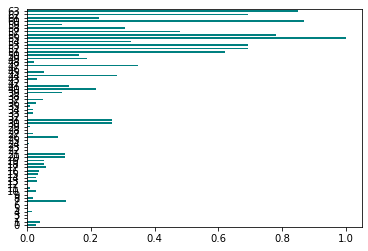

In [5]:
#feature selection
from sklearn.feature_selection import mutual_info_regression
%matplotlib inline
importances = mutual_info_regression(x, y)
df = pd.DataFrame(x)
feat_importances = pd.Series(importances, df.columns[0: len(df.columns)])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 49: ] = sc.fit_transform(x_train[:, 49: ])
x_test[:, 49: ] = sc.transform(x_test[:, 49: ])

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
ffs = SequentialFeatureSelector(regressor, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(x, y)
features = list(ffs.k_feature_names_)
features = list(map(int, features))

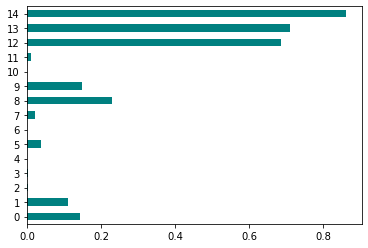

In [9]:
#feature selection
x_train = x_train[:, features]
x_test = x_test[:, features]
from sklearn.feature_selection import mutual_info_regression
%matplotlib inline
importances = mutual_info_regression(x_train, y_train)
df = pd.DataFrame(x_train)
feat_importances = pd.Series(importances, df.columns[0: len(df.columns)])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [10]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [11]:
y_pred = regressor.predict(x_test)
np.set_printoptions(suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16802.         13200.        ]
 [18859.23333333 19045.        ]
 [13473.3         9989.        ]
 [ 8529.5         6989.        ]
 [12457.         15510.        ]
 [ 8950.6        10295.        ]
 [ 7589.09285714  9980.        ]
 [ 5780.26666667  6669.        ]
 [ 7124.4         7053.        ]
 [ 8303.8         7975.        ]
 [ 5408.8         6479.        ]
 [ 6952.71666667  7099.        ]
 [ 6097.6         6692.        ]
 [ 6640.65        7799.        ]
 [ 7618.14285714  7295.        ]
 [11339.1        12945.        ]
 [10828.4         8449.        ]
 [ 8178.1         7775.        ]
 [14808.95       18620.        ]
 [ 6097.6         7609.        ]
 [15078.55       16515.        ]
 [13965.9        12964.        ]
 [ 5615.3         6377.        ]
 [ 6278.3         6295.        ]
 [ 9441.7        10345.        ]
 [ 9045.2         9538.        ]
 [15153.7        18150.        ]
 [ 8529.5         8189.        ]
 [ 7981.27857143  9495.        ]
 [17642.31666667 18420.        ]
 [10114.  

In [12]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.8211298479191337

In [13]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.50 %
Standard Deviation: 6.76 %
